Matplotlib is building the font cache; this may take a moment.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        100 non-null    object
 1   Product     100 non-null    object
 2   Region      100 non-null    object
 3   Units Sold  100 non-null    int64 
 4   Revenue     100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        100 non-null    datetime64[ns]
 1   Product     100 non-null    object        
 2   Region      100 non-null    object        
 3   Units Sold  100 non-null    int64         
 4   Revenue     100 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.0+ KB


C:\Users\sanke\AppData\Local\Temp\ipykernel_11368\2152605005.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Revenue'].fillna(df['Revenue'].mean(), inplace=True)


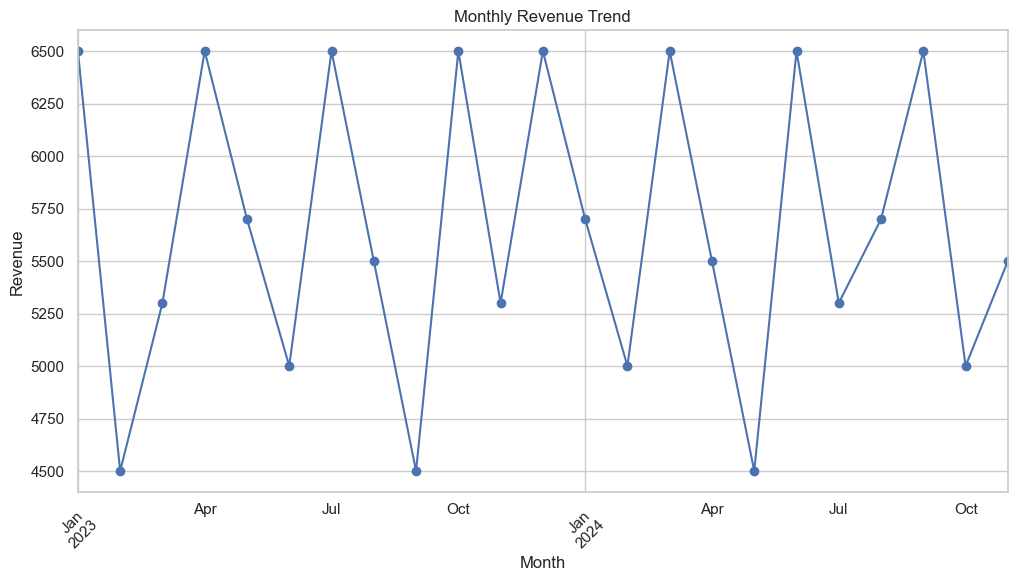

C:\Users\sanke\AppData\Local\Temp\ipykernel_11368\2152605005.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


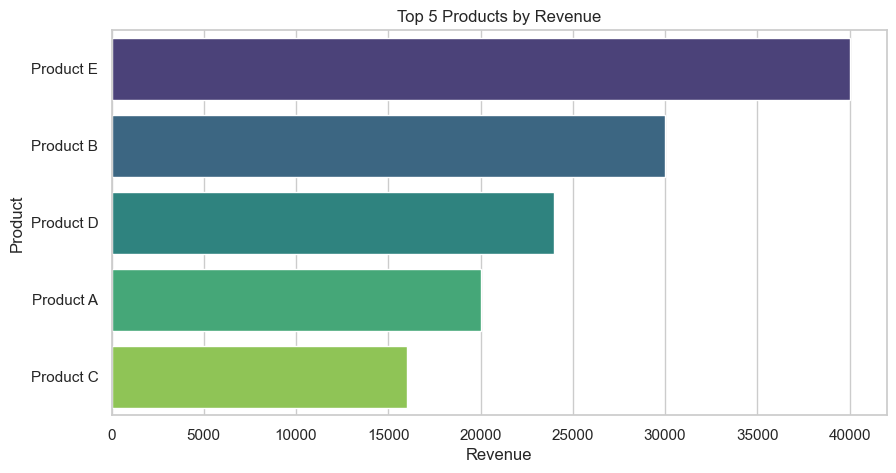

C:\Users\sanke\AppData\Local\Temp\ipykernel_11368\2152605005.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='rocket')


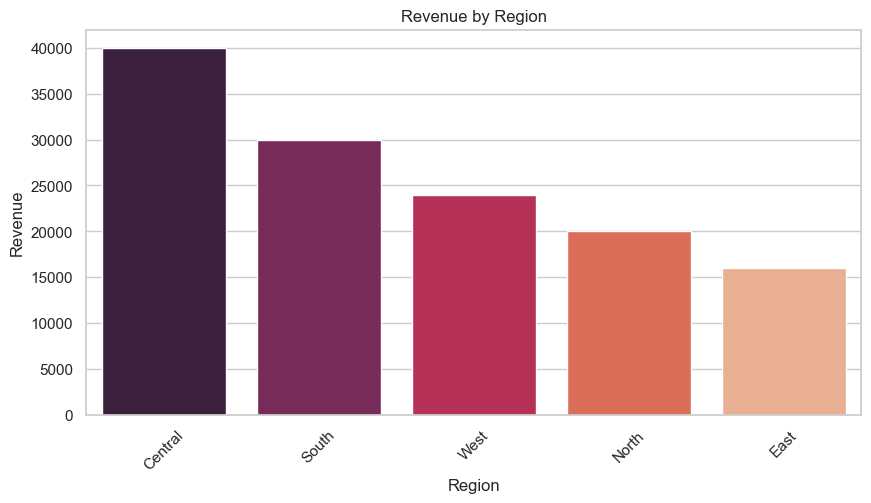

Key Insights:
- Identified monthly trends in revenue.
- Highlighted top-performing products.
- Analyzed regional sales performance.


In [1]:
# Sales Data Cleaning and Exploratory Data Analysis (EDA)

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load the Dataset
df = pd.read_csv('sales_data_sample.csv')  # Make sure your CSV file is in the same folder

# Display the first few rows
df.head()

# Basic Information
df.info()
df.isnull().sum()

# Data Cleaning
# Fill missing Revenue values with mean (if any)
if 'Revenue' in df.columns:
    df['Revenue'].fillna(df['Revenue'].mean(), inplace=True)

# Convert 'Date' to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Check after cleaning
df.info()

# Exploratory Data Analysis (EDA)

## 1. Monthly Revenue Trend
if 'Date' in df.columns and 'Revenue' in df.columns:
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_revenue = df.groupby('Month')['Revenue'].sum()

    plt.figure(figsize=(12,6))
    monthly_revenue.plot(kind='line', marker='o')
    plt.title('Monthly Revenue Trend')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## 2. Top 5 Products by Revenue
if 'Product' in df.columns and 'Revenue' in df.columns:
    top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)

    plt.figure(figsize=(10,5))
    sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
    plt.title('Top 5 Products by Revenue')
    plt.xlabel('Revenue')
    plt.ylabel('Product')
    plt.show()

## 3. Revenue by Region
if 'Region' in df.columns and 'Revenue' in df.columns:
    region_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10,5))
    sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='rocket')
    plt.title('Revenue by Region')
    plt.xlabel('Region')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45)
    plt.show()

# Summary
print("Key Insights:")
print("- Identified monthly trends in revenue.")
print("- Highlighted top-performing products.")
print("- Analyzed regional sales performance.")
